### <mark >4. Evaluating our Model</mark>

***Three ways to evaluate scikit-learn models/ estimators:***
1. Estimator `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

>Note: See [here](https://scikit-learn.org/stable/modules/model_evaluation.html) for more info.

Let's import our classification and regression datasets here so we can run our tests below...

>Note: Using uppercase `X` and `Y` for classification model and lowercase `x` and `y` for regression. This is not the convention but it will make everything run smoothly in one notebook.

In [4]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Let's create a classification model for our heart disease dataset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

heart_disease = pd.read_csv("data/heart-disease.csv")

X = heart_disease.drop('target', axis=1)
Y = heart_disease['target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [3]:
# Let's create a regression model for our housing dataset
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
housing_df['target'] = housing['target']

x = housing_df.drop('target', axis=1)
y = housing_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

___
#### <span style="color:hotpink">1. Estimator `score()` method</span>

The `score()` function on every machine learning model, has a default evaluation metric:
* Regression models return the coefficient of determination R^2 of the prediction
* Classification models return the mean accuracy on the given test data and labels

In [4]:
clf.score(X_test, Y_test) # accuracy

0.8524590163934426

> accuracy = (number of correct predictions)/(total number of predictions)

In [5]:
model.score(x_test, y_test) # r^2

0.8066196804802649

> [r^2](https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/assessing-fit-least-squares-regression/a/r-squared-intuition) = amount of prediction error eliminated using least-squares regression

___
#### <span style="color:hotpink">2. The `scoring` parameter</span>

- Model-evaluation tools using cross-validation (such as `cross_val_score()` and `GridSearchCV()`) take a `scoring` parameter that controls what metric they apply to the estimators evaluated.
- Example: `cross_val_score(clf, X, Y, cv=5, scoring='accuracy')`
- You can designate the scoring parameter with any of the scoring objects found in the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter).

#### <span style="color:pink">Cross Validation</span>

Cross validation evaluates models using multiple train-test-splits making it a better indication of how your model will perform.

<img src='images/cross_validation.png' alt='' height='300'>

Common scoring objects for classification:
* accuracy (default)
* precision
* recall
* f1

Common Scoring objects for regression:
* r2 (default)
* neg_mean_squared_error
* neg_mean_absolute_error

>Note: The negative mean squared error (-MSE) is just the mean squared error (MSE) with a negative sign in front. This is used to emphasize that we are measuring an error value and ideally we would want a lower error, thus a lower score. It's just there preferred way of looking at the data. The same goes for the absolute error.

> Note: The scoring parameter of `cross_val_score` is set to none by default. If `scoring = none`, it uses the default scoring parameter of our estimator.

In [6]:
# import cross_val_score()
from sklearn.model_selection import cross_val_score

In [7]:
# Using cross_val_score on our classification model
np.random.seed(42)

cv_default = cross_val_score(clf, X, Y, cv=5, scoring=None)
cv_accuracy = cross_val_score(clf, X, Y, cv=5, scoring='accuracy') # default
cv_precision = cross_val_score(clf, X, Y, cv=5, scoring='precision')
cv_recall = cross_val_score(clf, X, Y, cv=5, scoring='recall')
cv_f1 = cross_val_score(clf, X, Y, cv=5, scoring='f1')

print(f'Cross validation for default: {cv_default}')
print(f'The mean cross validated default is: {np.mean(cv_default)*100:.2f}%')
print('\n')
print(f'Cross validation for accuracy: {cv_accuracy}')
print(f'The mean cross validated accuracy is: {np.mean(cv_accuracy)*100:.2f}%')
print('\n')
print(f'Cross validation for precision: {cv_precision}')
print(f'The mean cross validated precision is: {np.mean(cv_precision)*100:.2f}%')
print('\n')
print(f'Cross validation for recall: {cv_recall}')
print(f'The mean cross validated recall is: {np.mean(cv_recall)*100:.2f}%')
print('\n')
print(f'Cross validation for f1: {cv_f1}')
print(f'The mean cross validated f1 is: {np.mean(cv_f1)*100:.2f}%')

Cross validation for default: [0.81967213 0.90163934 0.83606557 0.78333333 0.78333333]
The mean cross validated default is: 82.48%


Cross validation for accuracy: [0.78688525 0.86885246 0.80327869 0.78333333 0.76666667]
The mean cross validated accuracy is: 80.18%


Cross validation for precision: [0.80555556 0.90322581 0.83870968 0.78787879 0.76923077]
The mean cross validated precision is: 82.09%


Cross validation for recall: [0.84848485 0.87878788 0.84848485 0.81818182 0.84848485]
The mean cross validated recall is: 84.85%


Cross validation for f1: [0.86956522 0.89230769 0.81818182 0.85294118 0.79452055]
The mean cross validated f1 is: 84.55%


<span style="color:pink">Cross Validation on a Regression Model</span>

In [14]:
# Using cross_val_score on our regression model
np.random.seed(42)

cv_default = cross_val_score(model, x, y, cv=5, scoring=None)
cv_r2 = cross_val_score(model, x, y, cv=5, scoring='r2') # default
cv_mse = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(model, x, y, cv=5, scoring='neg_mean_absolute_error')

print(f'Cross validation for default: {cv_default}')
print(f'The average cross validated default is: {np.mean(cv_default)*100:.2f}%')
print('\n')
print(f'Cross validation for r2: {cv_r2}')
print(f'The average cross validated r2 is: {np.mean(cv_r2)*100:.2f}%')
print('\n')
print(f'Cross validation for Mean Squared Error (MSE): {cv_mse}')
print(f'The average cross validated Mean Squared Error (MSE) is: {np.mean(cv_mse)*100:.2f}%')
print('\n')
print(f'Cross validation for Mean Absolute Error (MAE): {cv_mae}')
print(f'The average cross validated Mean Absolute Error (MAE) is: {np.mean(cv_mae)*100:.2f}%')

Cross validation for default: [0.51682354 0.70280719 0.74200859 0.61659773 0.68247339]
The average cross validated default is: 65.21%


Cross validation for r2: [0.52220599 0.7003946  0.74071892 0.61721416 0.6779728 ]
The average cross validated r2 is: 65.17%


Cross validation for Mean Squared Error (MSE): [-0.52564242 -0.34426975 -0.37057463 -0.44321949 -0.46310656]
The average cross validated Mean Squared Error (MSE) is: -42.94%


Cross validation for Mean Absolute Error (MAE): [-0.54620933 -0.40938149 -0.43813761 -0.46370412 -0.47310423]
The average cross validated Mean Absolute Error (MAE) is: -46.61%


___
#### <span style="color:hotpink">3. Metric Functions</span>

We can use the `sklearn.metrics` module to evaluate scikit-learn models/estimators.

#### <span style="color:orange">Classification Evaluation Metrics</span>

1. Confusion Matrix
1. Area under ROC curve
1. Classification report

>Note: See [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html) for more info.

>Note: Some metrics require predictions or probability estimates.

In [19]:
# Probability estimates for classifier
Y_probs = clf.predict_proba(X_test) # returns probability estimates
Y_probs_positive = Y_probs[:, 1] # returns positive probability estimates (target=1)

> `predict_proba()` - returns a 2D array containing the probabilities for negative and positive target variables, without making a prediction either way

In [20]:
# Make some predictions using our classifier
Y_preds = clf.predict(X_test)

> `predict()` - returns a 1D array containing predictions for our target variable (Y_test in this case)

<span style="color:orange">Confusion Matrix</span>

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In [21]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
conf_mat = confusion_matrix(Y_test, Y_preds)
print(conf_mat)

[[24  5]
 [ 4 28]]


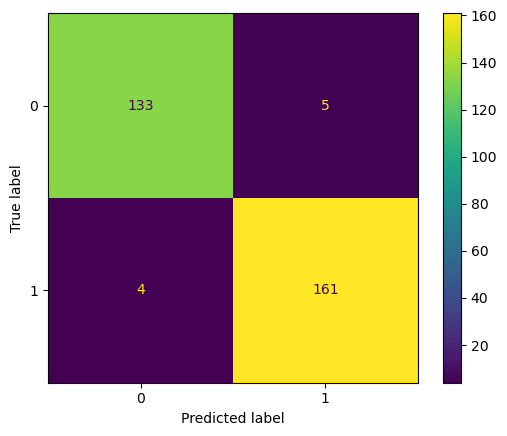

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

# from_estimator does not require predictions
ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X_test, y=Y_test); # need to rerun cell to get correct output!

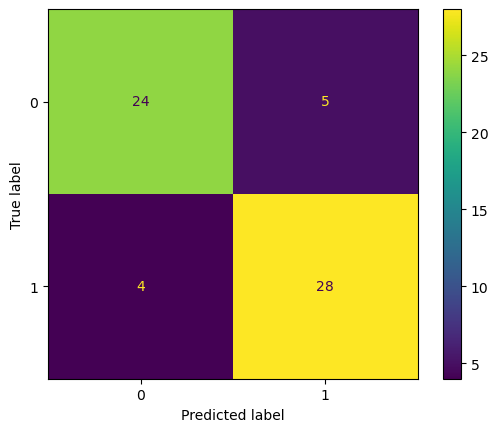

In [23]:
# from_predictions requires predictions
ConfusionMatrixDisplay.from_predictions(y_true=Y_test,
                                        y_pred=Y_preds);

<span style="color:orange">Area under ROC curve</span>

Receiver Operating Characteristic (ROC) curve
- Compare model's true positive rate (tpr) vs false positive rate (fpr)
- Used to identify the best threshold for making a decision

\
Area Under the Curve (AUC)
- Used to determine best categorization method

>Note: Primarily used for binary classification.

>Note: [Here](https://www.youtube.com/watch?v=4jRBRDbJemM) is a really helpful video!

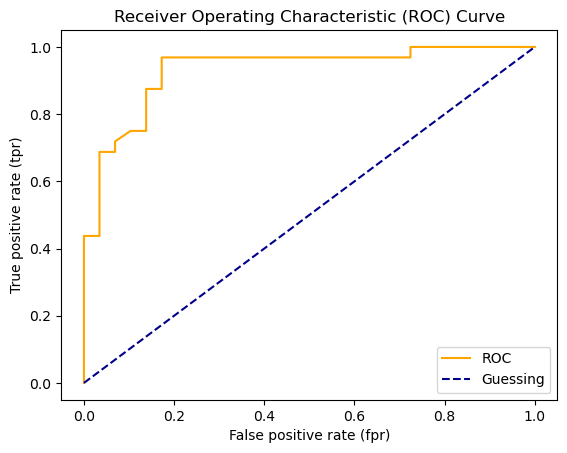

Area Under the ROC curve: 0.93


In [24]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(Y_test, Y_probs_positive)

# We can plot the roc curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='orange', label='ROC') # ROC curve
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing') # baseline (ROC with no predictive power)

plt.xlabel('False positive rate (fpr)')
plt.ylabel('True positive rate (tpr)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Generate roc_auc_score
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_probs_positive)

print(f'Area Under the ROC curve: {auc:.2f}') # perfect score = 1.0

<span style="color:green">Brief Overview of ROC AND AUC</span>

How a ROC and AUC are generated:
1. Fit Logistic regression curve to the data
2. Calculate fpr, tpr, and threshold values
- Generate a confusion matrix at various threshold values (0-1)
- Calculate tpr and fpr for each confusion matrix
3. Plot tpr and fpr to generate ROC curve
4. Calculate AUC as the area under the ROC curve

\
<span style="color:green">Calculating fpr, tpr, and threshold values:</span>

The True Positive Rate (TPR) tells you what proportion of positive samples (target = 1) were correctly classified.

`TPR = TP / (TP + FN)`

The False Positive Rate(FPR) tells you what proportion of negative samples (target = 0) were incorrectly classified.

`FPR = FP / (FP + TN) = 1 - Specificity`

| |Predicted|Label|
|:--:|:--:|:--:|
|True|TN|FP|
|Label|FN|TP|

True Positive (TP) = model predicts 1 when truth is 1

False Negative (FN) = model predicts 0 when truth is 1

False Positive (FP) = model predicts 1 when truth is 0

True Negative (TN) = model predicts 0 when truth is 0



<span style="color:orange">Classification Report</span>

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [ ]:
# Import classification evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate the classifier
print('Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(Y_test, Y_preds)*100:.2f}%')
print(f'Precision: {precision_score(Y_test, Y_preds)*100:.2f}%')
print(f'Recall: {recall_score(Y_test, Y_preds)*100:.2f}%')
print(f'F1: {f1_score(Y_test, Y_preds)*100:.2f}%')

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


<span style="color:green">**Classification report metrics summarize the confusion matrix:**</span>

| |Predicted 0|Predicted 1|
|:--:|:--:|:--:|
|**True 0**|TN|FP|
|**True 1**|FN|TP|

<span style="color:green">**Precision**</span>

Percentage of predicted positive results (target=1) that were correctly classified.

`Precision = TP / (TP + FP)`

<span style="color:green">**Recall / Sensitivity / TPR**</span>

Percentage of actual positive results (target=1) that were correctly classified.

`Recall = TP / (TP + FN)`

<span style="color:green">**F1 score**</span>

Harmonic mean of Precision and Recall.

`F1 = 2 / ((1/Recall) + (1/Precision)) = (2 * Precision * Recall) / (Precision + Recall)`

<span style="color:green">**Support**</span>

Number of samples each metric was calculated on.

`Support (0) = TN + FP`

`Support (1) = FN + TP`

<span style="color:green">**Accuracy**</span>

Percentage of correct predictions overall.

`(TN + TP) / (TN + TP + FN + FP)`

<span style="color:green">**Macro avg**</span>

Arithmetic mean of the individual class (precision, recall, etc.)

`(P0 + P1) / 2`

<span style="color:green">**Weighted avg**</span>

Average calculated with respect to the number of samples are in each class.

`((P0 * S0) + (P1 * S1)) / (S0 + S1)`


In [26]:
# From our confusion matrix...
TN = 24
FP = 5
FN = 4
TP = 28

P0 = TN / (TN + FN) # percent of negative predictions that were correctly classified
P1 = TP / (TP + FP) # percent of positive predictions that were correctly classified

R0 = TN / (TN + FP) # percent of actual positive labels that were correctly classified
R1 = TP / (TP + FN) # percent of actual positive labels that were correctly classified

F0 = (2 * P0 * R0) / (P0 + R0) # harmonic mean of P0 and R0
F1 = (2 * P1 * R1) / (P1 + R1) # harmonic mean of P0 and R0

S0 = TN + FP # total number of negative samples
S1 = FN + TP # total number of positive samples

A = (TN + TP) / (TN + TP + FN + FP) # percent of correct predictions overall

mac_avg_P = (P0 + P1) / 2 # average precision
mac_avg_R = (R0 + R1) / 2 # average recall
mac_avg_F = (F0 + F1) / 2 # average f1-score

weighted_avg_P = ((P0 * S0) + (P1 * S1)) / (S0 + S1) # average precision
weighted_avg_R = ((R0 * S0) + (R1 * S1)) / (S0 + S1) # average recall
weighted_avg_F = ((F0 * S0) + (F1 * S1)) / (S0 + S1) # average f1-score

print(f'P0: {P0:.2f}')
print(f'P1: {P1:.2f}')
print('\n')
print(f'R0: {R0:.2f}')
print(f'R1: {R1:.2f}')
print('\n')
print(f'F0: {F0:.2f}')
print(f'F1: {F1:.2f}')
print('\n')
print(f'S0: {S0}')
print(f'S1: {S1}')
print('\n')
print(f'A: {A:.2f}')
print('\n')
print(f'mac_avg_P: {mac_avg_P:.2f}')
print(f'mac_avg_R: {mac_avg_R:.2f}')
print(f'mac_avg_F: {mac_avg_F:.2f}')
print('\n')
print(f'weighted_avg_P: {weighted_avg_P:.2f}')
print(f'weighted_avg_R: {weighted_avg_R:.2f}')
print(f'weighted_avg_F: {weighted_avg_F:.2f}')

P0: 0.86
P1: 0.85


R0: 0.83
R1: 0.88


F0: 0.84
F1: 0.86


S0: 29
S1: 32


A: 0.85


mac_avg_P: 0.85
mac_avg_R: 0.85
mac_avg_F: 0.85


weighted_avg_P: 0.85
weighted_avg_R: 0.85
weighted_avg_F: 0.85


#### <span style="color:red">Regression Evaluation Metrics</span>

1. R^2 (pronounced r-squared) or coefficient of determination.
1. Mean absolute error (MAE)
1. Mean squared error (MSE)

>Note: See [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics) for more info.

In [ ]:
# Import regression evaluation metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Make some predictions using our regression model
y_preds = model.predict(x_test)

#Evaluate the regression model
print('Regression model metrics on the test set')
print(f'R^2: {r2_score(y_test, y_preds)*100:.2f}%')
print(f'MAE: {mean_absolute_error(y_test, y_preds)*100:.2f}%') # mean absolute difference
print(f'MSE: {mean_squared_error(y_test, y_preds)*100:.2f}%') # mean squared difference